# **Dataset Overview:**


*   The dataset contains 300,153 rows and 12 columns.
*   There are no missing values in any of the columns, which simplifies the data cleaning process.
*   The data types are appropriate for most columns. However, categorical columns like 'airline', 'source_city', 'destination_city', etc., will need to be encoded for use in machine learning models.






In [1]:
import pandas as pd
import sklearn
import numpy as np


In [2]:
data = pd.read_csv('/content/Clean_Dataset.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.shape

(300153, 12)

In [6]:
data.count()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [7]:
data.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [8]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
data.drop(columns=('Unnamed: 0'))

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# **Exploratory Data Analysis and Feature Engenerring**

In [10]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [11]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
data.select_dtypes(['object']).columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

## **Distribution of Key Features:**



*   Visualize the distribution of 'price', 'duration', and 'days_left'.
*   Explore the distribution of flights across different airlines, source cities, and destination cities.





In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# One-hot encoding for categorical variables
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# data_encoded['departure_hour'] = pd.to_datetime(data_encoded['departure_time'], errors='coerce').dt.hour

# Display the transformed dataset
data_encoded.head()


,Unnamed: 0,flight,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,0,SG-8709,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,1,SG-8157,2.33,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
2,2,I5-764,2.17,1,5956,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,3,UK-995,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,UK-963,2.33,1,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


# Price Distribution:


*   The price distribution appears to have a wide range, indicating variability in flight prices.
*   There could be multiple peaks suggesting different price segments.



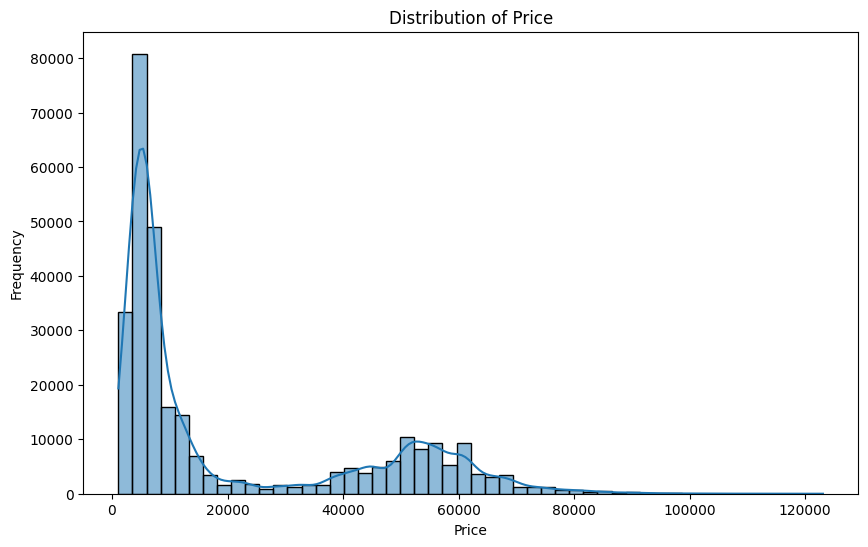

In [15]:
# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Duration Distribution:


*   The distribution of flight durations shows a range of values, with certain durations being more common.
*   This could reflect common flight routes and their typical durations.



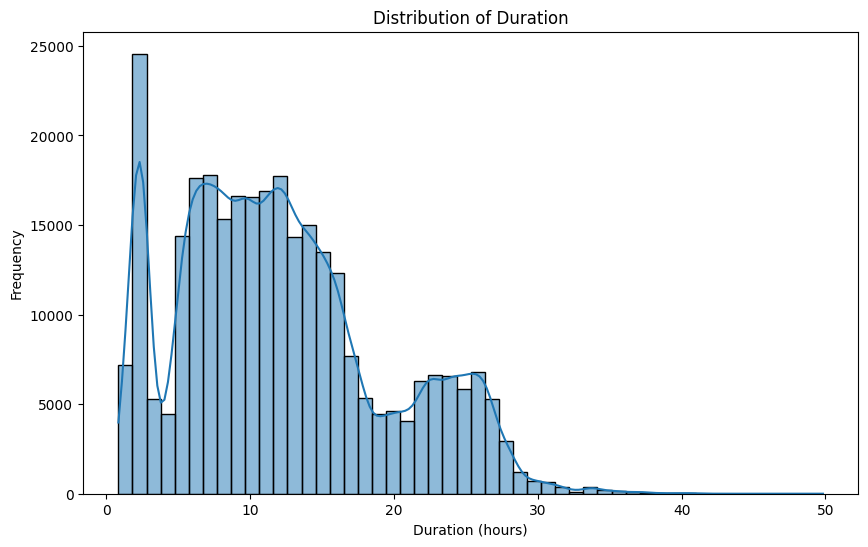

In [16]:
# Distribution of 'duration'
plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], bins=50, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Days Left Distribution:


*   The distribution of days left before the flight shows an interesting pattern, possibly indicating booking trends.



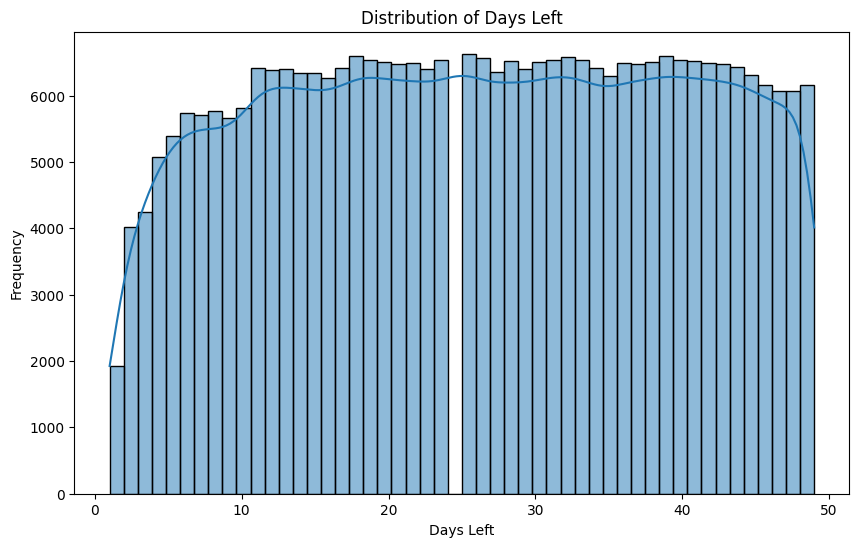

In [17]:
# Distribution of 'days_left'
plt.figure(figsize=(10, 6))
sns.histplot(data['days_left'], bins=50, kde=True)
plt.title('Distribution of Days Left')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()


# **Correlation Analysis:**


*   Perform a correlation analysis to see how strongly different features are related to the 'price'.


---
\
The correlation heatmap provides a visual representation of how different features in the dataset are related to each other, especially with respect to the target variable 'price'. In this heatmap:


*   Darker red colors indicate a positive correlation, meaning that as one feature increases, the other feature tends to increase as well.
*   Darker blue colors indicate a negative correlation, where an increase in one feature corresponds to a decrease in the other.

*   Lighter colors suggest weaker correlations.


---
\
# **Key Observations:**



*   **Correlation with Price:**

  *   Some features will show a stronger correlation with 'price'. These are the features that might be more influential in predicting flight prices.
  *   It's important to note that correlation does not imply causation. Even if two features are correlated, it doesn't mean one causes the other to change.


*   **Feature Interrelationships:**
  *   The heatmap also shows how different features relate to each other, which can be important for understanding the data structure and potential multicollinearity issues in regression models.
















<ipython-input-18-f5215a3cff7d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_encoded.corr(), annot=False, cmap='coolwarm')


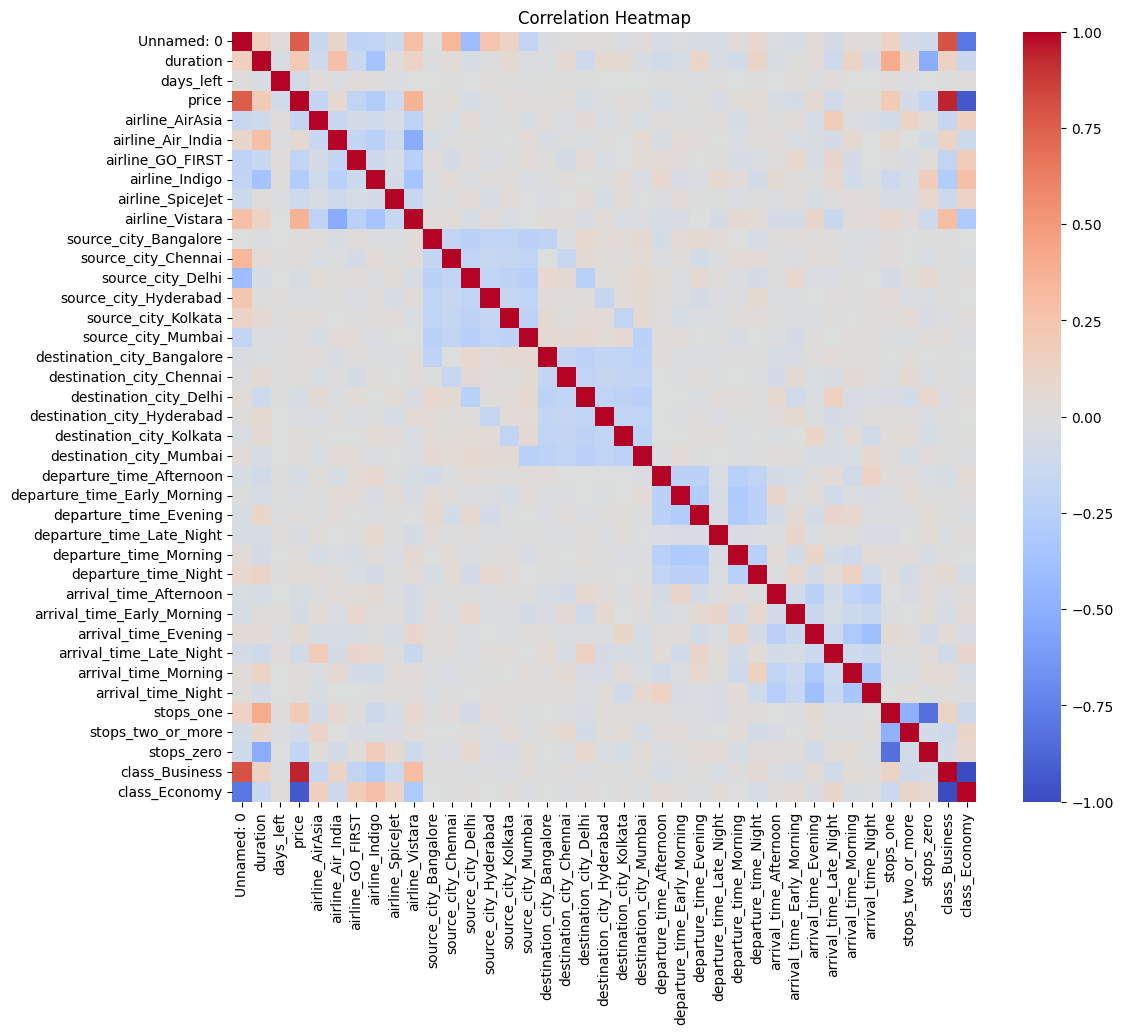

In [18]:

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Feature-Specific Analysis:**


*   Analyze the distribution and impact of individual categorical features like 'airline', 'source_city', 'destination_city', 'stops', and 'class' on the price.
*   Investigate if certain airlines, cities, or types of stops are associated with higher or lower prices.



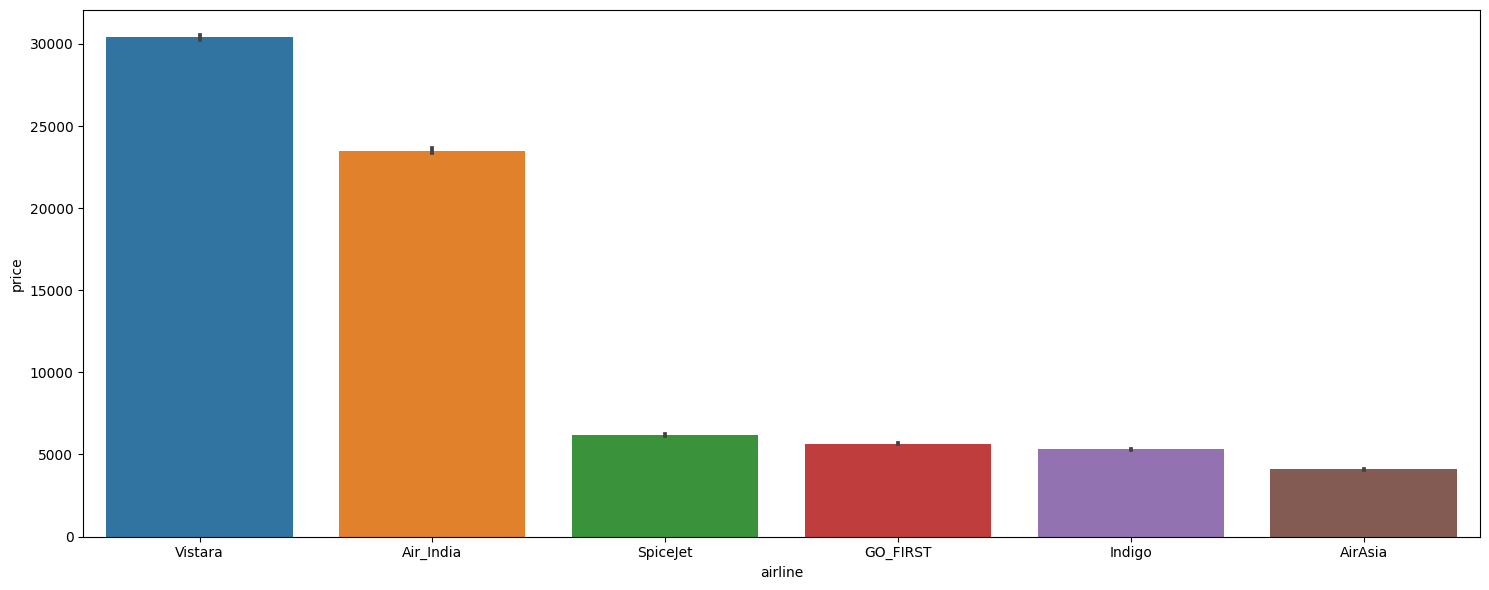

In [19]:
plt.figure(figsize = (15, 6))
ax = sns.barplot(x = 'airline', y = 'price', data = data.sort_values('price', ascending = False))
plt.tight_layout()
plt.show()

**Price Distribution by Airline:**


*   There's noticeable variability in prices among different airlines. Some airlines show a wider range of prices, indicating diverse flight options from budget to premium.




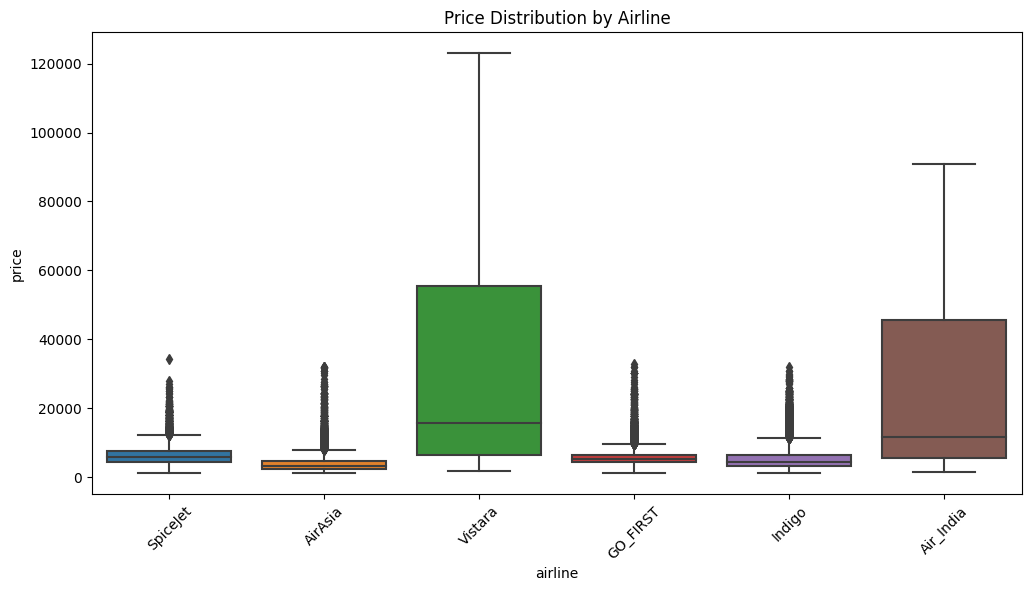

In [20]:
# Price distribution by different airlines
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=data)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.show()


**Price Distribution by Source City:**


*   Flight prices also vary significantly based on the source city. Certain cities may have higher average prices, possibly due to factors like demand, distance, and airport fees.




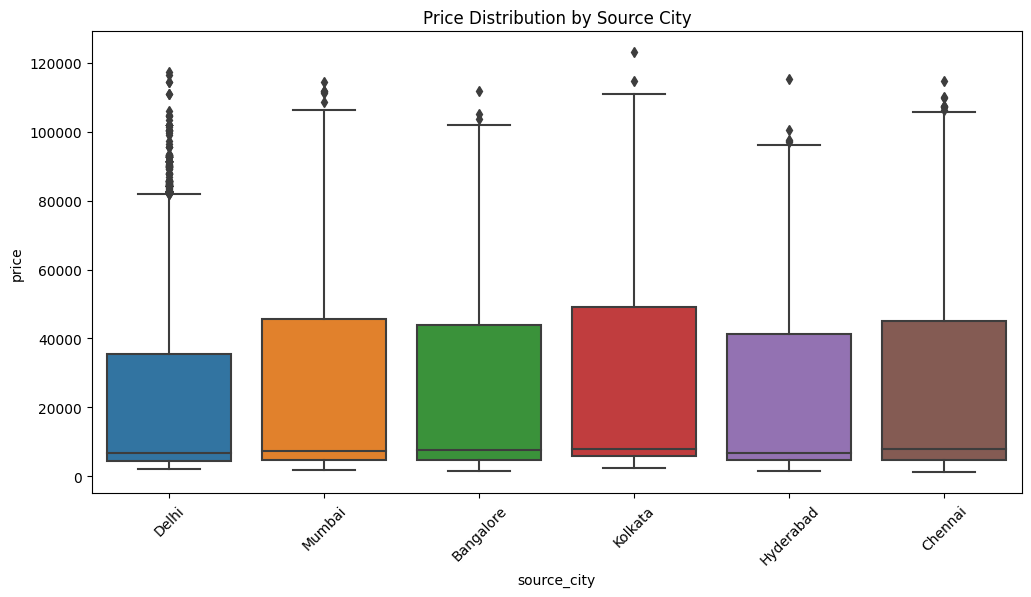

In [21]:
# Price distribution by source city
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=data)
plt.title('Price Distribution by Source City')
plt.xticks(rotation=45)
plt.show()

**Price Distribution by Destination City:**


*   Similar to source cities, the destination cities also show variation in flight prices. This could reflect the popularity of the destination, the number of available routes, and other logistical factors.




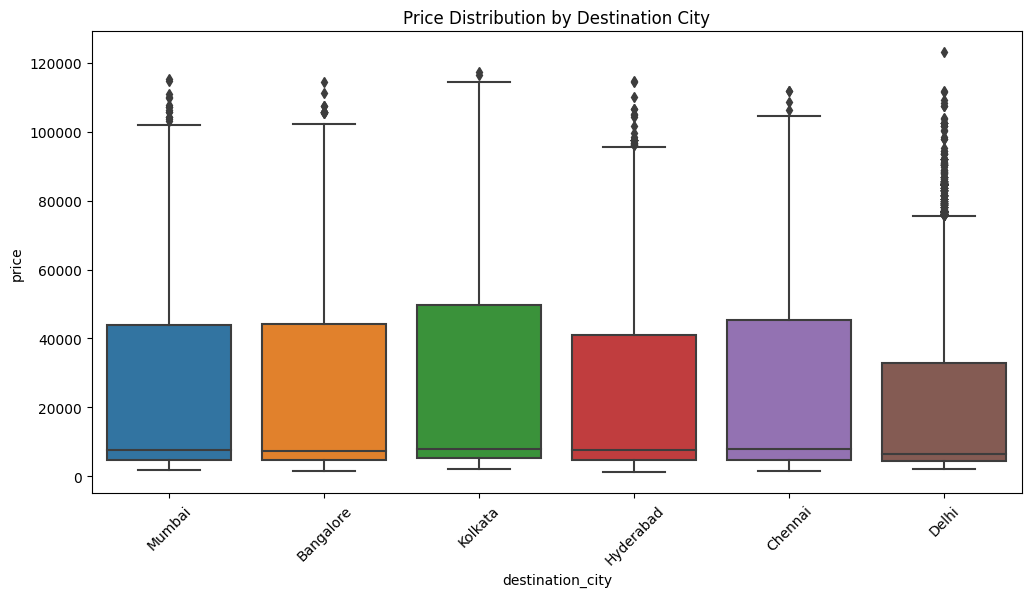

In [22]:
# Price distribution by destination city
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_city', y='price', data=data)
plt.title('Price Distribution by Destination City')
plt.xticks(rotation=45)
plt.show()

**Price Distribution by Type of Stops:**


*   The number of stops (direct, one-stop, two or more stops) greatly influences the price. Direct flights often have a different price range compared to flights with stops.




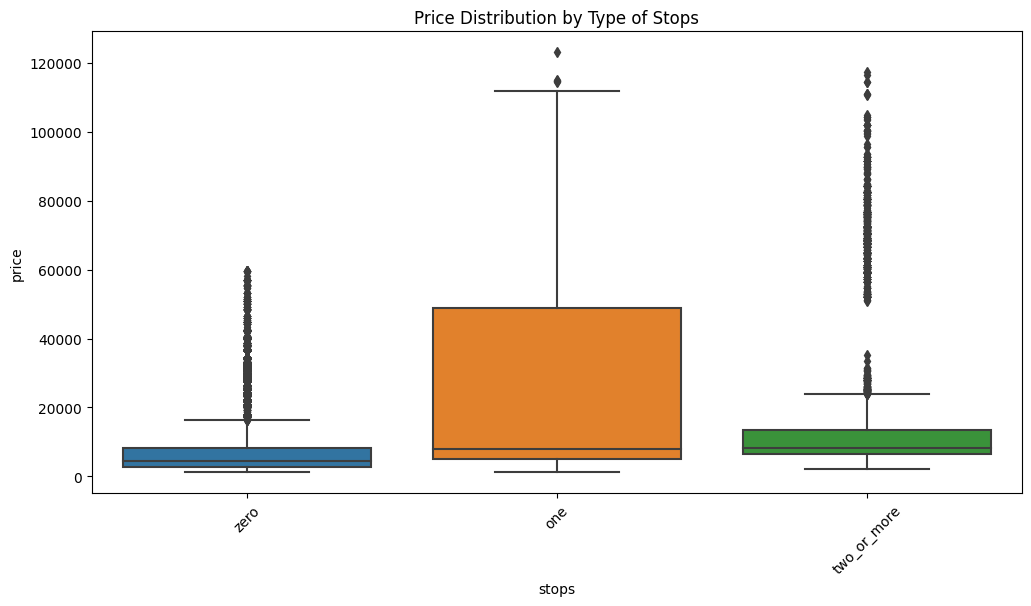

In [23]:

# Price distribution by type of stops
plt.figure(figsize=(12, 6))
sns.boxplot(x='stops', y='price', data=data)
plt.title('Price Distribution by Type of Stops')
plt.xticks(rotation=45)
plt.show()


# **Time-Based Analysis**


*   **Impact of Departure and Arrival Times:**
  *   Explore if flights at certain times of the day are generally more expensive.
  *   Analyze if the time of arrival impacts the price.


*   **Price Trends with Days Left:**
  *   Investigate how flight prices change as the departure date approaches. This can reveal if prices tend to increase or decrease closer to the flight date.






**Impact of Departure Time on Price:**


*   The prices vary significantly depending on the time of departure. Some departure times, like 'Early Morning' or 'Evening', may have higher average prices, possibly due to higher demand or convenience.




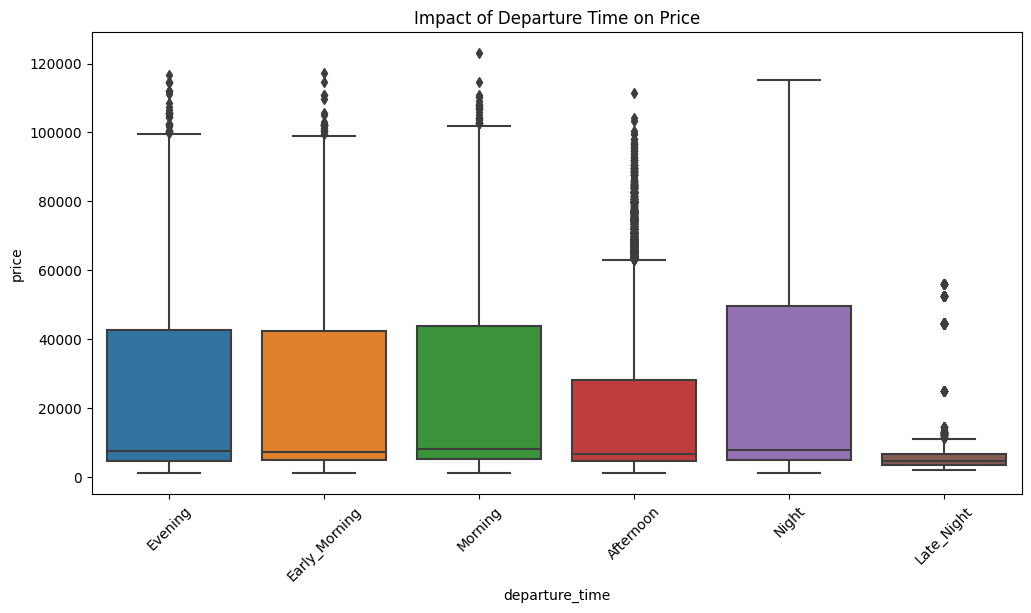

In [24]:
# Impact of Departure Time on Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='departure_time', y='price', data=data)
plt.title('Impact of Departure Time on Price')
plt.xticks(rotation=45)
plt.show()

**Impact of Arrival Time on Price:**


*   Similar to departure times, arrival times also show variability in prices. This suggests that the timing of flights (both departure and arrival) is an important factor in determining price.




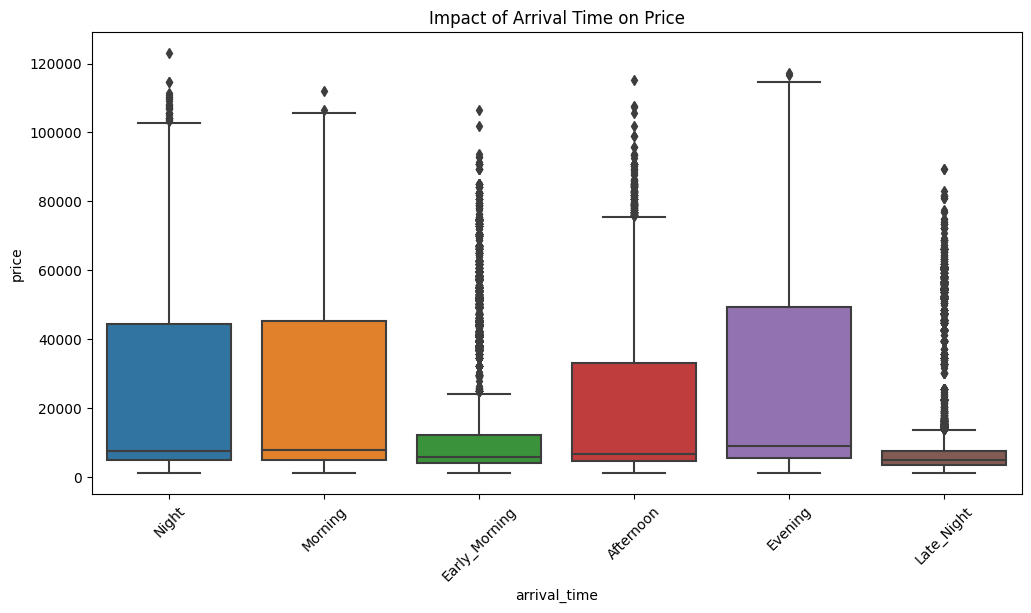

In [25]:
# Impact of Arrival Time on Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='arrival_time', y='price', data=data)
plt.title('Impact of Arrival Time on Price')
plt.xticks(rotation=45)
plt.show()

**Price Trends with Days Left:**


*   The trend line indicates how prices change as the departure date approaches. There seems to be a pattern, possibly showing price fluctuations based on how far in advance a ticket is purchased.




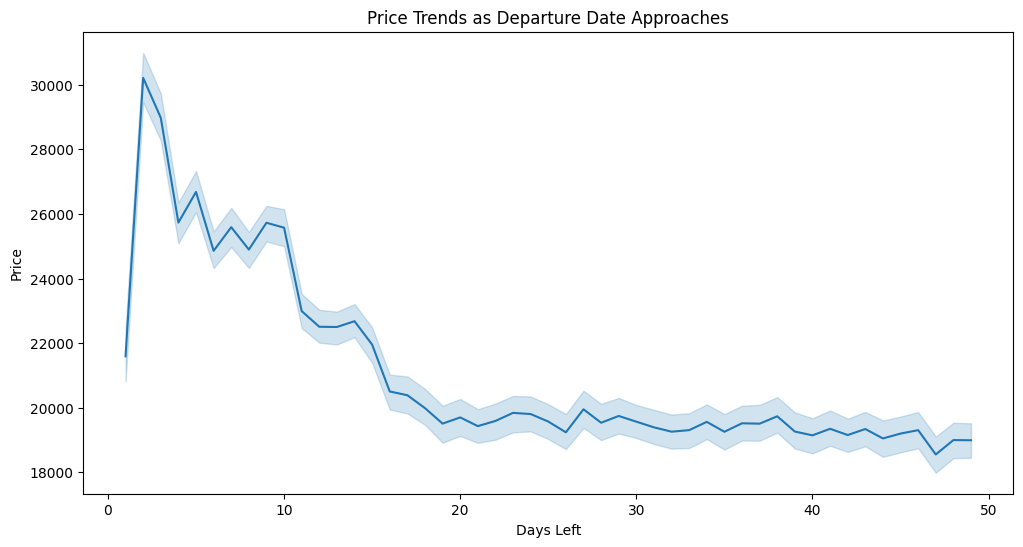

In [26]:

# Price Trends with Days Left
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=data)
plt.title('Price Trends as Departure Date Approaches')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()


# **Outlier Detection**


*   **Identifying Outliers:**
  *   Detect outliers in 'price' and 'duration' using statistical methods or visual inspection.


*   Deciding on Outlier Treatment:
  *   Decide whether to keep, modify, or remove outliers. The choice will depend on the nature of the outliers and the objectives of the analysis.








---


For outlier detection, we can use boxplots to visually inspect for
outliers in 'price' and 'duration'. We'll then decide on the best approach to handle these outliers based on their nature and impact.

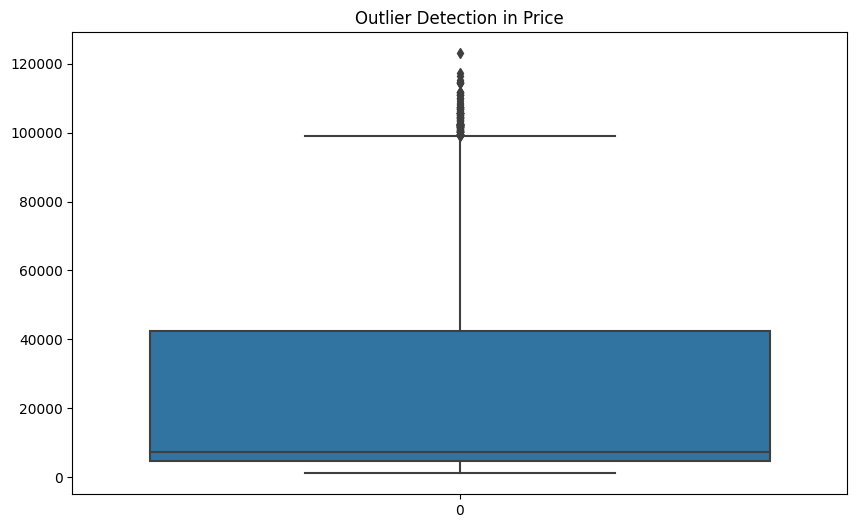

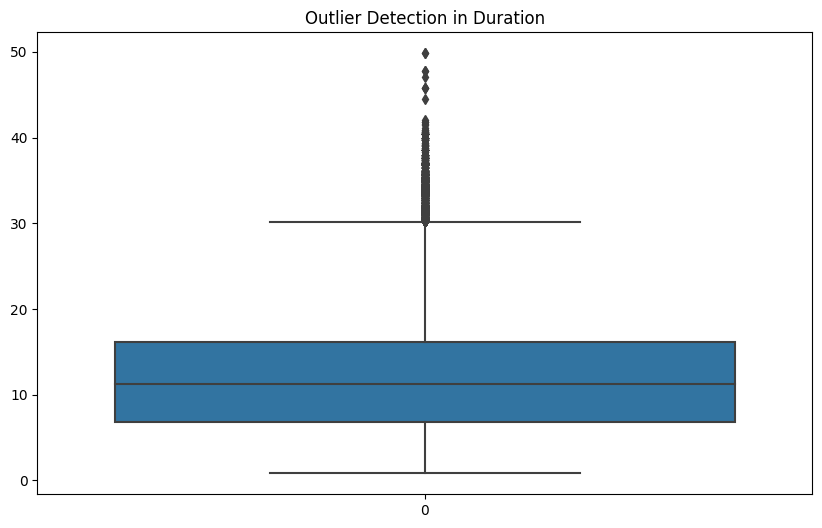

In [27]:
# Outlier Detection in Price
plt.figure(figsize=(10, 6))
sns.boxplot(data['price'])
plt.title('Outlier Detection in Price')
plt.show()

# Outlier Detection in Duration
plt.figure(figsize=(10, 6))
sns.boxplot(data['duration'])
plt.title('Outlier Detection in Duration')
plt.show()


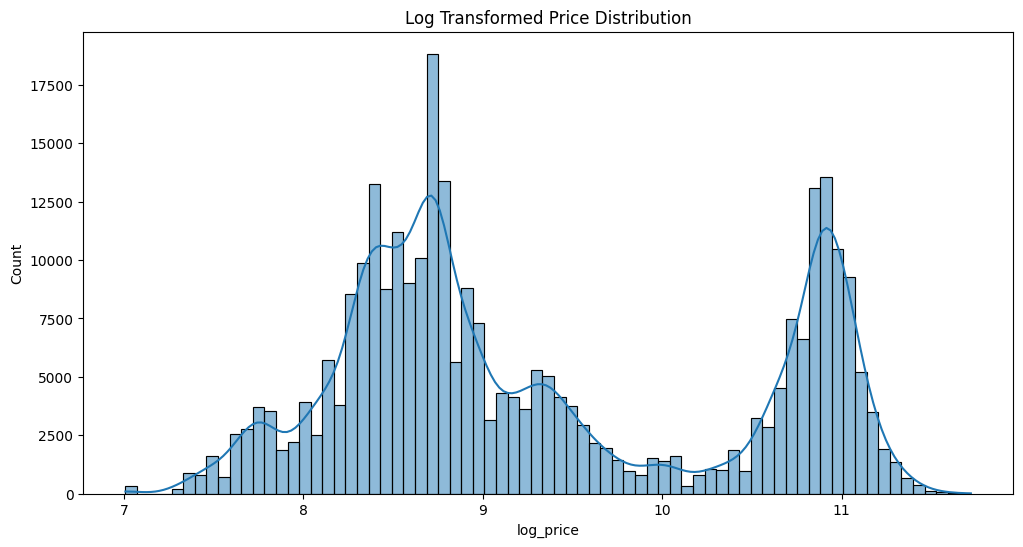

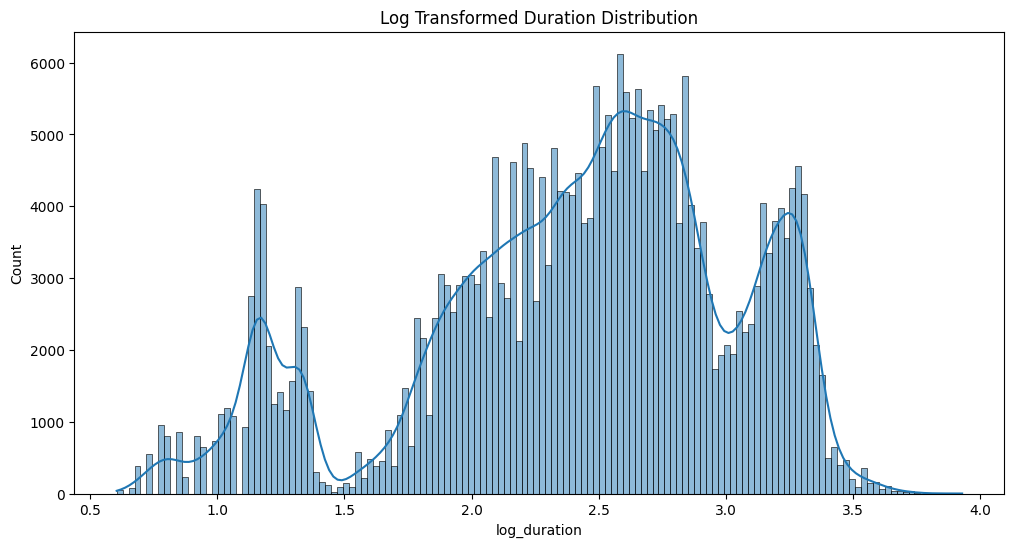

In [28]:
import numpy as np

# Applying log transformation
data['log_price'] = np.log(data['price'] + 1)  # Adding 1 to avoid log(0)
data['log_duration'] = np.log(data['duration'] + 1)

# Visualizing the transformed features
plt.figure(figsize=(12, 6))
sns.histplot(data['log_price'], kde=True)
plt.title('Log Transformed Price Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['log_duration'], kde=True)
plt.title('Log Transformed Duration Distribution')
plt.show()


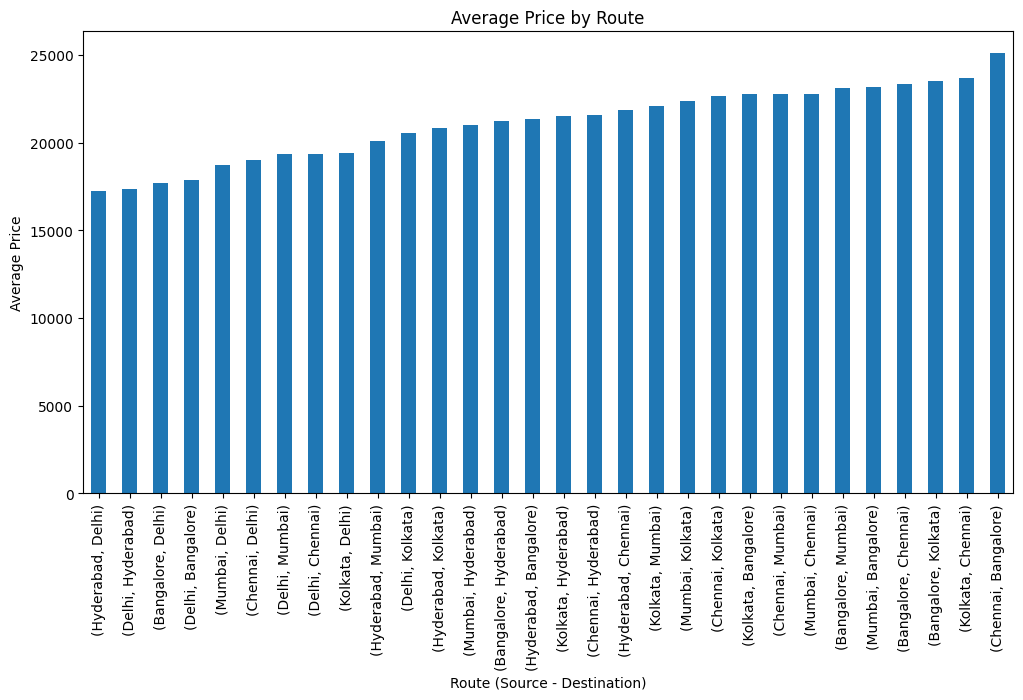

In [29]:
# Route Analysis: Price by Source and Destination Cities
plt.figure(figsize=(12, 6))
data.groupby(['source_city', 'destination_city'])['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Route')
plt.xlabel('Route (Source - Destination)')
plt.ylabel('Average Price')
plt.show()




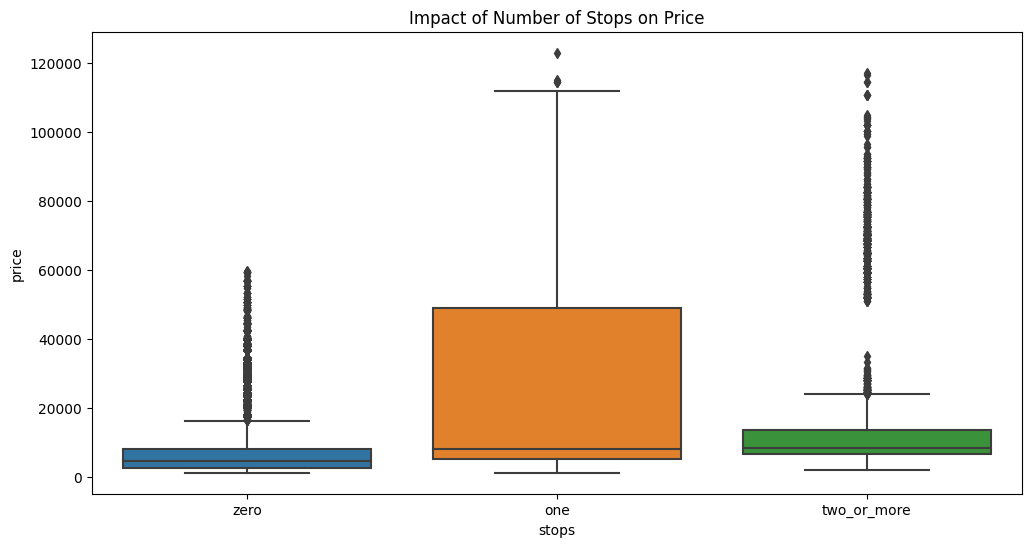

In [30]:


# Impact of Number of Stops on Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='stops', y='price', data=data)
plt.title('Impact of Number of Stops on Price')
plt.show()


In [31]:
# Checking for missing values
missing_values = data_encoded.isnull().sum()
print(missing_values)

# If there are missing values, handle them (imputation or removal)
# data_encoded.fillna(method='ffill', inplace=True)  # Example: forward-fill imputation


Unnamed: 0                      0
flight                          0
duration                        0
days_left                       0
price                           0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
source_city_Bangalore           0
source_city_Chennai             0
source_city_Delhi               0
source_city_Hyderabad           0
source_city_Kolkata             0
source_city_Mumbai              0
destination_city_Bangalore      0
destination_city_Chennai        0
destination_city_Delhi          0
destination_city_Hyderabad      0
destination_city_Kolkata        0
destination_city_Mumbai         0
departure_time_Afternoon        0
departure_time_Early_Morning    0
departure_time_Evening          0
departure_time_Late_Night       0
departure_time_Morning          0
departure_time_Night            0
arrival_time_A

In [32]:
from sklearn.preprocessing import StandardScaler

# Identifying continuous features
continuous_features = ['duration', 'days_left']  # Modify this list based on your dataset

# Applying standard scaler
scaler = StandardScaler()
data_encoded[continuous_features] = scaler.fit_transform(data_encoded[continuous_features])


In [33]:
import pandas as pd

# Assuming 'data_encoded' is your DataFrame
# Identify categorical columns
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=categorical_cols)

# Now, you can proceed with your feature selection and model training


In [34]:
#data_encoded = data_encoded.drop('Unnamed: 0', axis=1)

print(data_encoded)



        Unnamed: 0  duration  days_left  price  airline_AirAsia  \
0                0 -1.397531  -1.843875   5953                0   
1                1 -1.375284  -1.843875   5953                0   
2                2 -1.397531  -1.843875   5956                1   
3                3 -1.386407  -1.843875   5955                0   
4                4 -1.375284  -1.843875   5955                0   
...            ...       ...        ...    ...              ...   
300148      300148 -0.297695   1.695692  69265                0   
300149      300149 -0.250421   1.695692  77105                0   
300150      300150  0.223718   1.695692  79099                0   
300151      300151 -0.308819   1.695692  81585                0   
300152      300152 -0.297695   1.695692  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1                       0        

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Load your data
# data_encoded = pd.read_csv('your_data.csv')  # Assuming your data is in a CSV file
#data_encoded = data_encoded.drop('Unnamed: 0', axis=1)  # Drop the 'Unnamed: 0' column

# Split the data
X = data_encoded.drop('price', axis=1)  # Assuming 'price' is the target variable
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {

    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LinearRegression': LinearRegression(),
    'RandomForesert': RandomForestRegressor()

}

# Function to train and evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        results[name] = {'R2': r2}
        print(f'{name}:  R2 = {r2}')
    return results

# Evaluating each model
model_results = evaluate_models(models, X_train, y_train, X_test, y_test)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model_results' contains the MSE and R2 for each model
# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(model_results).T

# Bar chart for Mean Squared Error
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Mean Squared Error of Different Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Bar chart for R2 Score
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('R2 Score of Different Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Function to train, evaluate, and perform cross-validation on models
def evaluate_and_cross_validate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'Cross-Val R2 Mean': scores.mean(), 'Test R2': r2, 'Test MSE': mse}
        print(f'{name} - Cross-Val R2 Mean: {scores.mean()}, Test R2: {r2}, Test MSE: {mse}')
    return results

# Evaluating each model with cross-validation
model_results = evaluate_and_cross_validate(models, X_train, y_train, X_test, y_test)

# Assuming 'model_results' contains the cross-validation R2 mean, R2, and MSE for each model
# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(model_results).T

# Bar chart for Cross-Validation R2 Mean
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='Cross-Val R2 Mean', data=results_df)
plt.title('Cross-Validation R2 Mean of Different Models')
plt.ylabel('R2 Mean')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()




In [ ]:
# Hafiz for jsut reference

In [ ]:

categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical_columns = ['duration', 'days_left','price']

# One-hot encode categorical features
df_encoded = pd.get_dummies(data[categorical_columns])

# Concatenate the one-hot encoded features with the numerical features
df_encoded = pd.concat([df_encoded, data[numerical_columns]], axis=1)

df_encoded.head(3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_encoded
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

In [ ]:
# ### using Decision Tree Regressor


# ###Defining (instantiating) an "object" from the sklearn class

# my_decisiontree_regressor = DecisionTreeRegressor(random_state=5)


# # Training ONLY on the training set:

# my_decisiontree_regressor.fit(X_train, y_train)



# # Testing on the testing set:

# y_predict_dt = my_decisiontree_regressor.predict(X_test)


# print('prediction using DecisionTreeRegressor')
# print(y_predict_dt)
# print()

# # Evaluate the model
# mse = mean_squared_error(y_test, y_predict_dt)
# print(f'Mean Squared Error: {mse}')

# rmse = np.sqrt(mse)
# print(f'Root Mean Squared Error: {rmse}')


from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np



# Create a pipeline with an imputer and the decision tree regressor
pipeline = make_pipeline(SimpleImputer(strategy='mean'), DecisionTreeRegressor(random_state=5))

# Handle missing values in the target variable
y_train_imputed = SimpleImputer(strategy='mean').fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Training ONLY on the training set
pipeline.fit(X_train, y_train_imputed)

# Testing on the testing set
y_predict_dt = pipeline.predict(X_test)

print('Prediction using DecisionTreeRegressor after imputation')
print(y_predict_dt)
print()

# Evaluate the model
mse = mean_squared_error(y_test, y_predict_dt)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
shape_y_pred = np.shape(y_predict_dt)
shape_y_test = np.shape(y_test)

print(f"Shape of y_pred: {shape_y_pred}")
print(f"Shape of y_test: {shape_y_test}")

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is your actual values and 'y_predict_dt' is your predicted values for Decision Tree Regression

plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, label='Actual', marker='o')

# Plotting the predicted values from Decision Tree Regression
plt.plot(y_predict_dt, label='Predicted (Decision Tree Regression)', marker='o', linestyle='--')

plt.legend()
plt.title('Actual vs. Predicted Values using Decision Tree Regression')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline with an imputer and the linear regression model
pipeline_lr = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

# Handle missing values in the target variable
y_train_imputed_lr = SimpleImputer(strategy='mean').fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Training ONLY on the training set
pipeline_lr.fit(X_train, y_train_imputed_lr)

# Testing on the testing set
y_predict_lr = pipeline_lr.predict(X_test)

print('Linear Regression prediction after imputation')
print(y_predict_lr)
print()

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_predict_lr)
print(f'Mean Squared Error: {mse_lr}')

rmse_lr = np.sqrt(mse_lr)
print(f'Root Mean Squared Error: {rmse_lr}')


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is your actual values and 'y_pred' is your predicted values for Linear Regression

plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, label='Actual', marker='o')

# Plotting the predicted values from Linear Regression
plt.plot(y_predict_lr, label='Predicted (Linear Regression)', marker='o', linestyle='--')

plt.legend()
plt.title('Actual vs. Predicted Values using Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()
